In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates

In [2]:
df = pd.read_csv('C:/Users/TripleA/Desktop/coding related/python/TISS/1_MONTH.csv', encoding='unicode_escape')

In [3]:
df.dropna(inplace=True)
df.shape

(5859, 13)

In [4]:
df.dtypes

Date & Time                object
Temp - °C                 float64
High Temp - °C            float64
Low Temp - °C             float64
Hum - %                   float64
High Hum - %              float64
Low Hum - %               float64
Heat Index - °C           float64
High Heat Index - °C      float64
Rain - in                 float64
High Rain Rate - in-h     float64
Solar Rad - W-m^2         float64
High Solar Rad - W-m^2    float64
dtype: object

In [5]:
df['Date & Time'] = pd.to_datetime(df['Date & Time'], format ='mixed' )

In [6]:
df.dtypes

Date & Time               datetime64[ns]
Temp - °C                        float64
High Temp - °C                   float64
Low Temp - °C                    float64
Hum - %                          float64
High Hum - %                     float64
Low Hum - %                      float64
Heat Index - °C                  float64
High Heat Index - °C             float64
Rain - in                        float64
High Rain Rate - in-h            float64
Solar Rad - W-m^2                float64
High Solar Rad - W-m^2           float64
dtype: object

In [7]:
df.head()

,Date & Time,Temp - °C,High Temp - °C,Low Temp - °C,Hum - %,High Hum - %,Low Hum - %,Heat Index - °C,High Heat Index - °C,Rain - in,High Rain Rate - in-h,Solar Rad - W-m^2,High Solar Rad - W-m^2
89,2023-09-01 07:25:00,28.0,28.0,28.0,83.0,83.0,83.0,32.0,32.0,0.0,0.0,30.0,30.0
106,2023-09-01 08:50:00,29.0,29.0,29.0,79.0,79.0,79.0,35.0,35.0,0.0,0.0,375.0,376.0
107,2023-09-01 08:55:00,29.0,29.0,29.0,78.0,79.0,78.0,35.0,35.0,0.0,0.0,370.0,376.0
108,2023-09-01 09:00:00,30.0,30.0,29.0,77.0,78.0,77.0,36.0,36.0,0.0,0.0,271.0,357.0
109,2023-09-01 09:05:00,30.0,30.0,29.0,76.0,77.0,76.0,36.0,36.0,0.0,0.0,301.0,336.0


In [8]:
df.set_index('Date & Time' , inplace=True)

SOLAR RADIATION

    WEEK

In [9]:
per_week = df[['Solar Rad - W-m^2', 'High Solar Rad - W-m^2']].resample('W')


In [10]:
per_week.max()


,Solar Rad - W-m^2,High Solar Rad - W-m^2
Date & Time,,
2023-09-03,808.0,824.0
2023-09-10,834.0,946.0
2023-09-17,954.0,979.0
2023-09-24,995.0,1046.0
2023-10-01,927.0,956.0


Text(0, 0.5, 'W-m^2')

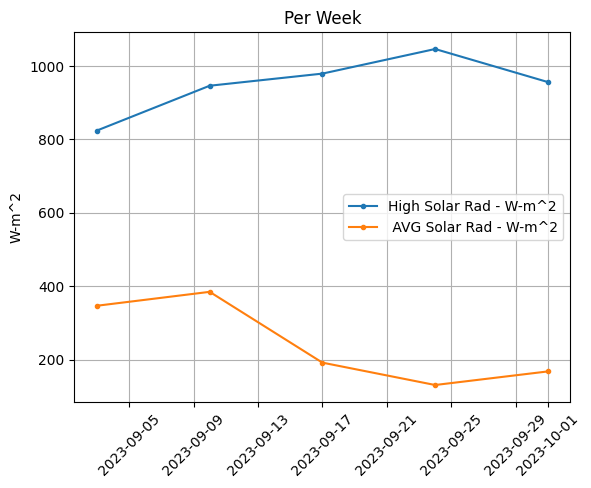

In [17]:
plt.plot(per_week['High Solar Rad - W-m^2'].max() , '.-' , label='High Solar Rad - W-m^2')
plt.plot(per_week['Solar Rad - W-m^2'].mean() , '.-' , label=' AVG Solar Rad - W-m^2')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.title('Per Week')
plt.ylabel('W-m^2')

DAY

In [14]:
per_day = df[['Solar Rad - W-m^2', 'High Solar Rad - W-m^2']].resample('D')

In [15]:
per_day.max().head()

,Solar Rad - W-m^2,High Solar Rad - W-m^2
Date & Time,,
2023-09-01,808.0,824.0
2023-09-02,700.0,729.0
2023-09-03,42.0,42.0
2023-09-04,791.0,861.0
2023-09-05,798.0,802.0


Text(0, 0.5, 'W-m^2')

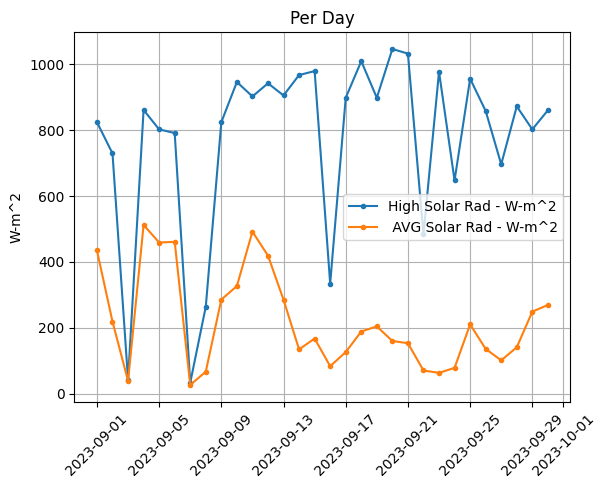

In [18]:
plt.plot(per_day['High Solar Rad - W-m^2'].max() , '.-' , label='High Solar Rad - W-m^2')
plt.plot(per_day['Solar Rad - W-m^2'].mean() , '.-' , label=' AVG Solar Rad - W-m^2')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.title('Per Day')
plt.ylabel('W-m^2')

Day with highest radiation

In [54]:
day20 = df['2023-09-20 00:00:00':'2023-09-20 23:55:00']

In [55]:
day20 = day20[['Solar Rad - W-m^2', 'High Solar Rad - W-m^2']].resample('h')

In [57]:
day20.max().head()

,Solar Rad - W-m^2,High Solar Rad - W-m^2
Date & Time,,
2023-09-20 00:00:00,0.0,0.0
2023-09-20 01:00:00,0.0,0.0
2023-09-20 02:00:00,0.0,0.0
2023-09-20 03:00:00,0.0,0.0
2023-09-20 04:00:00,0.0,0.0


Text(0, 0.5, 'W-m^2')

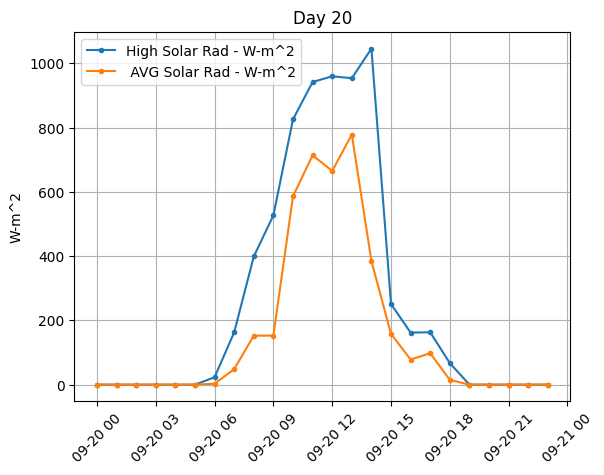

In [59]:
plt.plot(day20['High Solar Rad - W-m^2'].max() , '.-' , label='High Solar Rad - W-m^2')
plt.plot(day20['Solar Rad - W-m^2'].mean() , '.-' , label=' AVG Solar Rad - W-m^2')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.title('Day 20')
plt.ylabel('W-m^2')